MOVIE RECOMMENDATION SYSTEM
CONTENT BASED RS

In [71]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [47]:
cols='user_id item_id rating timestamp'.split()

In [49]:
df=pd.read_csv('u.data',sep='\t',names=cols)
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [50]:
df.sample(5)

user_id  item_id  rating  timestamp
12423       14      275       4  876964725
21313      474      480       5  887925186
36406      537      875       1  886028544
73168      899      385       3  884121612
11572      364      321       2  875931478

In [53]:
cols_movies=['item_id','title']+[str(i) for i in range (22)]
movie_titles=pd.read_csv('u.item',sep='|',names=cols_movies)

In [54]:
movie_titles.head()

item_id              title            0   1  \
0        1   Toy Story (1995)  01-Jan-1995 NaN   
1        2   GoldenEye (1995)  01-Jan-1995 NaN   
2        3  Four Rooms (1995)  01-Jan-1995 NaN   
3        4  Get Shorty (1995)  01-Jan-1995 NaN   
4        5     Copycat (1995)  01-Jan-1995 NaN   

                                                   2  3  4  5  6  7  ...  12  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  0  0  0  1  1  ...   0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  0  1  1  0  0  ...   0   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  0  0  0  0  0  ...   0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  0  1  0  0  0  ...   0   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  0  0  0  0  0  ...   0   

   13  14  15  16  17  18  19  20  21  
0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   1   0   0  
2   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   1   0   0  

[5 rows x 24 columns]

In [55]:
movie_titles=movie_titles[['item_id','title']]
movie_titles.sample(5)

item_id                         title
935       936            Brassed Off (1996)
1223     1224             Scout, The (1994)
1176     1177      Dunston Checks In (1996)
241       242                  Kolya (1996)
1567     1568  Vermont Is For Lovers (1992)

In [56]:
#Merging or Concatenating or Joining
#pd.merge
#pd.concat
#pd.join

In [57]:
movie_titles.shape

(1682, 2)

In [58]:
df.shape

(100000, 4)

In [59]:
data=pd.merge(df,movie_titles, on='item_id')
data.sample(10)

user_id  item_id  rating  timestamp  \
18010      883      648       4  891694249   
66449      301      447       4  882078955   
56941      650       22       3  891369707   
18992      666      200       5  880568465   
13578      885      338       3  885712224   
92082      543      519       4  875662979   
81130        5      102       3  875721196   
80564      126      313       5  887854726   
43658      327       12       3  887744205   
98222      144     1285       3  888105922   

                                          title  
18010                     Quiet Man, The (1952)  
66449                             Carrie (1976)  
56941                         Braveheart (1995)  
18992                       Shining, The (1980)  
13578                               Bean (1997)  
92082  Treasure of the Sierra Madre, The (1948)  
81130                    Aristocats, The (1970)  
80564                            Titanic (1997)  
43658                Usual Suspects, The (1995)  
98222                   Princess Caraboo (1994)

EXPLORATORY DATA ANALYSIS(EDA)

In [62]:
data['title'].value_counts().head(20)

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [63]:
data['title'].value_counts().tail(20)

Every Other Weekend (1990)                            1
Tigrero: A Film That Was Never Made (1994)            1
Target (1995)                                         1
Quartier Mozart (1992)                                1
Big One, The (1997)                                   1
Killer: A Journal of Murder (1995)                    1
Touki Bouki (Journey of the Hyena) (1973)             1
Sweet Nothing (1995)                                  1
Gate of Heavenly Peace, The (1995)                    1
Promise, The (Versprechen, Das) (1994)                1
Tokyo Fist (1995)                                     1
Wend Kuuni (God's Gift) (1982)                        1
Pharaoh's Army (1995)                                 1
Vie est belle, La (Life is Rosey) (1987)              1
Lotto Land (1995)                                     1
Big Bang Theory, The (1994)                           1
Death in the Garden (Mort en ce jardin, La) (1956)    1
Nobody Loves Me (Keiner liebt mich) (1994)      

In [64]:
df['rating'].mean()

3.52986

In [65]:
for i in data['title'].unique():
    print(i, data['rating'][data['title']==i].mean(), sep='\t')

Kolya (1996)	3.9914529914529915
L.A. Confidential (1997)	4.161616161616162
Heavyweights (1994)	2.1538461538461537
Legends of the Fall (1994)	3.45679012345679
Jackie Brown (1997)	3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)	4.252577319587629
Hunt for Red October, The (1990)	3.8634361233480177
Jungle Book, The (1994)	3.5647058823529414
Grease (1978)	3.347058823529412
Remains of the Day, The (1993)	3.94
Men in Black (1997)	3.745874587458746
Romy and Michele's High School Reunion (1997)	3.061224489795918
Star Trek: First Contact (1996)	3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)	2.8947368421052633
Batman Forever (1995)	2.6666666666666665
Only You (1994)	3.1538461538461537
Age of Innocence, The (1993)	3.3846153846153846
Sabrina (1995)	3.5
Just Cause (1995)	3.142857142857143
Endless Summer 2, The (1994)	2.5
Man Without a Face, The (1993)	3.5441176470588234
Sabrina (1954)	3.796875
Die Hard (1988)	3.8724279835390947


In [66]:
#Groupby
data.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [67]:
rating = pd.DataFrame(data.groupby('title')['rating'].mean())
rating.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [68]:
rating['count'] = data['title'].value_counts()
rating.head()

rating  count
title                                     
'Til There Was You (1997)  2.333333      9
1-900 (1994)               2.600000      5
101 Dalmatians (1996)      2.908257    109
12 Angry Men (1957)        4.344000    125
187 (1997)                 3.024390     41

In [69]:
sum(rating['count']<10)

520

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency-->')

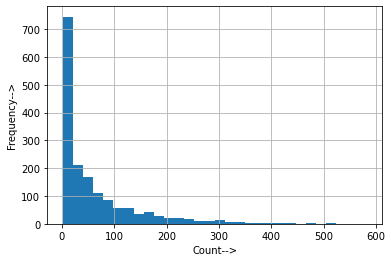

In [74]:
rating['count'].hist(bins=30)
plt.xlabel('Count-->')
plt.ylabel('Frequency-->')

In [75]:
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivot_df.head(20)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
6                              NaN           NaN                    NaN   
7                              NaN           NaN                    NaN   
8                              NaN           NaN                    NaN   
9                              NaN           NaN                    NaN   
10                             NaN           NaN                    NaN   
11                             NaN           NaN                    NaN   
12                             NaN           NaN                    NaN   
13                             NaN           NaN                    2.0   
14                             NaN           NaN                    NaN   
15                             NaN           NaN                    3.0   
16                             NaN           NaN                    NaN   
17                             NaN           NaN                    NaN   
18                             NaN           NaN                    NaN   
19                             NaN           NaN                    NaN   
20                             NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
6                        4.0         NaN                          NaN   
7                        4.0         NaN                          NaN   
8                        NaN         NaN                          NaN   
9                        NaN         NaN                          NaN   
10                       5.0         NaN                          NaN   
11                       NaN         NaN                          NaN   
12                       NaN         NaN                          NaN   
13                       4.0         NaN                          NaN   
14                       NaN         NaN                          NaN   
15                       NaN         NaN                          NaN   
16                       5.0         NaN                          NaN   
17                       NaN         NaN                          NaN   
18                       3.0         NaN                          NaN   
19                       NaN         NaN                          NaN   
20                       NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
6                                        NaN                           5.0   
7                                        5.0                           5.0   
8                                       

In [76]:
rating.sort_values('count', ascending = False).head(20)

rating  count
title                                            
Star Wars (1977)                  4.358491    583
Contact (1997)                    3.803536    509
Fargo (1996)                      4.155512    508
Return of the Jedi (1983)         4.007890    507
Liar Liar (1997)                  3.156701    485
English Patient, The (1996)       3.656965    481
Scream (1996)                     3.441423    478
Toy Story (1995)                  3.878319    452
Air Force One (1997)              3.631090    431
Independence Day (ID4) (1996)     3.438228    429
Raiders of the Lost Ark (1981)    4.252381    420
Godfather, The (1972)             4.283293    413
Pulp Fiction (1994)               4.060914    394
Twelve Monkeys (1995)             3.798469    392
Silence of the Lambs, The (1991)  4.289744    390
Jerry Maguire (1996)              3.710938    384
Chasing Amy (1997)                3.839050    379
Rock, The (1996)                  3.693122    378
Empire Strikes Back, The (1980)   4.204360    367
Star Trek: First Contact (1996)   3.660274    365

In [77]:
sw_ratings = pivot_df['Star Wars (1977)']

In [78]:
sw_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

Finding Correlation

In [79]:
pivot_df['1-900 (1994)'].mean()

2.6

In [81]:
similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [82]:
corr_df = pd.DataFrame(similarity_sw, columns = ['Correlation'])
corr_df.dropna(inplace=True)
corr_df.sort_values('Correlation')

Correlation
title                                              
Frankie Starlight (1995)                       -1.0
Roseanna's Grave (For Roseanna) (1997)         -1.0
Two Deaths (1995)                              -1.0
I Like It Like That (1994)                     -1.0
Theodore Rex (1995)                            -1.0
...                                             ...
Cosi (1996)                                     1.0
Commandments (1997)                             1.0
Hollow Reed (1996)                              1.0
Man of the Year (1995)                          1.0
No Escape (1994)                                1.0

[1410 rows x 1 columns]

In [83]:
corr_df = corr_df.join(rating['count'])
corr_df.head()

Correlation  count
title                                        
'Til There Was You (1997)     0.872872      9
1-900 (1994)                 -0.645497      5
101 Dalmatians (1996)         0.211132    109
12 Angry Men (1957)           0.184289    125
187 (1997)                    0.027398     41

In [84]:
corr_df[corr_df['count']>200].sort_values(by='Correlation',ascending=False).head(30)

Correlation  count
title                                                           
Star Wars (1977)                                 1.000000    583
Empire Strikes Back, The (1980)                  0.747981    367
Return of the Jedi (1983)                        0.672556    507
Raiders of the Lost Ark (1981)                   0.536117    420
Sting, The (1973)                                0.367538    241
Indiana Jones and the Last Crusade (1989)        0.350107    331
L.A. Confidential (1997)                         0.319065    297
E.T. the Extra-Terrestrial (1982)                0.303619    300
Batman (1989)                                    0.289344    201
Field of Dreams (1989)                           0.285286    212
Star Trek: The Wrath of Khan (1982)              0.282206    244
Back to the Future (1985)                        0.274839    350
Wizard of Oz, The (1939)                         0.266335    246
Jaws (1975)                                      0.265459    280
Terminator, The (1984)                           0.262255    301
Princess Bride, The (1987)                       0.259711    324
Get Shorty (1995)                                0.259182    209
Star Trek: First Contact (1996)                  0.255529    365
Aliens (1986)                                    0.254444    284
Alien (1979)                                     0.248991    291
Independence Day (ID4) (1996)                    0.248754    429
Casablanca (1942)                                0.248016    243
Lion King, The (1994)                            0.235606    220
2001: A Space Odyssey (1968)                     0.230884    259
It's a Wonderful Life (1946)                     0.222846    231
Apollo 13 (1995)                                 0.222006    276
Willy Wonka and the Chocolate Factory (1971)     0.221902    326
Usual Suspects, The (1995)                       0.211075    267
Fish Called Wanda, A (1988)                      0.209464    247
Terminator 2: Judgment Day (1991)                0.207599    295

In [85]:
ter_ratings = pivot_df['Terminator 2: Judgment Day (1991)']
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['Correlation'])
corr_df_ter.dropna(inplace=True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values(by='Correlation',ascending=False).head(3)

Correlation  count
title                                                
Terminator 2: Judgment Day (1991)     1.000000    295
Terminator, The (1984)                0.562853    301
True Lies (1994)                      0.516728    208

In [86]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['Correlation']>0.55)].sort_values(by='Correlation',ascending=False)

Correlation  count
title                                                
Terminator 2: Judgment Day (1991)     1.000000    295
Terminator, The (1984)                0.562853    301